In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anos= []

for ano in range(2013,2019):
    anos.append(str(ano))


df_edu = pd.read_csv('dados/government_expenditure/API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_4411877.csv', skiprows=4, decimal='.')
df_edu_nor = df_edu.iloc[177]
df_edu_bra = df_edu.iloc[29]
df_edu_afe = df_edu.iloc[2]

df_desem = pd.read_csv('dados/desemprego/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_4488595.csv', skiprows=4, decimal='.')

df_desem_nor = df_desem.iloc[177]
df_desem_bra = df_desem.iloc[29]
df_desem_afe = df_desem.iloc[2]

all_nor = pd.concat((df_desem_nor, df_edu_nor), join='outer', axis=1)
all_bra = pd.concat((df_desem_bra, df_edu_bra), join='outer', axis=1)
all_afe = pd.concat((df_desem_afe, df_edu_afe), join='outer', axis=1)
# manipulação de data frama
all_nor = all_nor.transpose()
all_bra = all_bra.transpose()
all_afe = all_afe.transpose()

all_nor.head()




    


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
177,Norway,NOR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.42,3.48,4.3,4.68,4.16,3.8,3.69,4.42,4.985,NaN
177,Norway,NOR,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.48535,7.69504,7.56933,8.03055,7.91198,7.64411,NaN,NaN,NaN,NaN


C:\Users\Asus\AppData\Local\Temp\ipykernel_61736\809726286.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lista_anos, lista_norway1, "r--", color= 'red', marker = "o", label= 'Desemprego - Noruega (% da população)')
C:\Users\Asus\AppData\Local\Temp\ipykernel_61736\809726286.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lista_anos, lista_brasil1, "r--", color= 'blue', marker = "o", label= 'Desemprego - Brasil (% da população)')
C:\Users\Asus\AppData\Local\Temp\ipykernel_61736\809726286.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lista_anos, lista_afeg1, "r--", color= 'orange', marker = "o", label= 'Dese

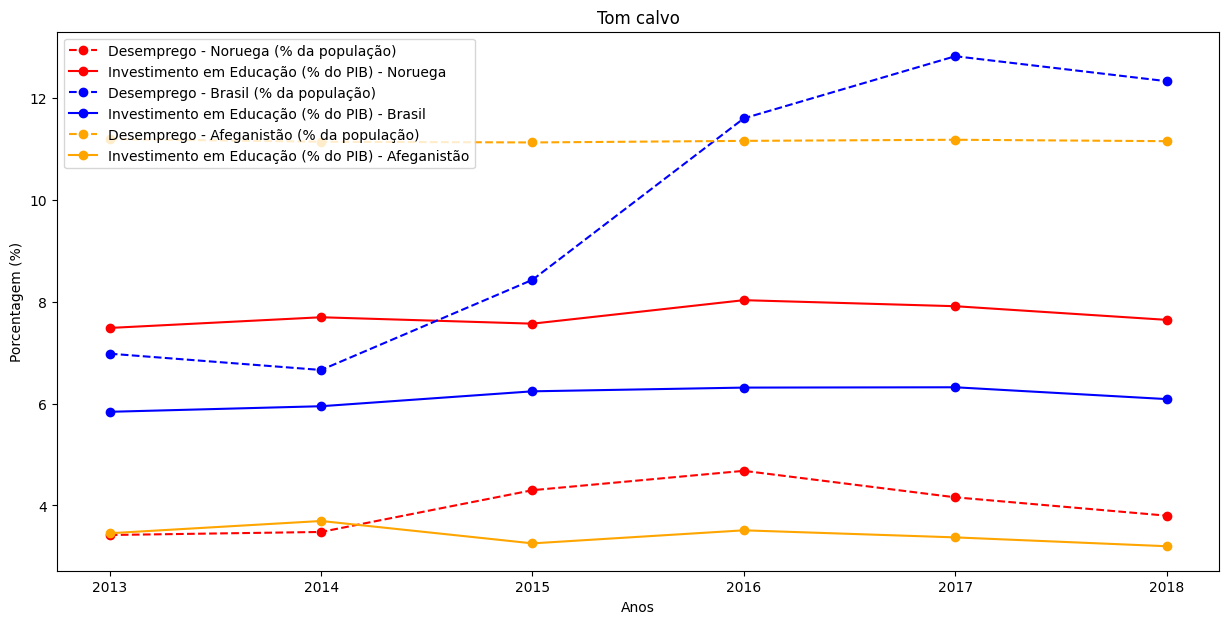

In [130]:
lista_norway1 = []
lista_norway2 = []

lista_brasil1 = []
lista_brasil2 = []

lista_afeg1 = []
lista_afeg2 = []



lista_anos = list(range(2013,2019))




data_norway1 = all_nor[all_nor['Indicator Code'] == 'SL.UEM.TOTL.ZS']
data_norway2 = all_nor[all_nor['Indicator Code'] == 'SE.XPD.TOTL.GD.ZS']

data_brasil1 = all_bra[all_bra['Indicator Code'] == 'SL.UEM.TOTL.ZS']
data_brasil2 = all_bra[all_bra['Indicator Code'] == 'SE.XPD.TOTL.GD.ZS']

data_afeg1 = all_afe[all_afe['Indicator Code'] == 'SL.UEM.TOTL.ZS']
data_afeg2 = all_afe[all_afe['Indicator Code'] == 'SE.XPD.TOTL.GD.ZS']


for ano in lista_anos:
    lista_norway1.append(data_norway1[str(ano)])
    lista_norway2.append(data_norway2[str(ano)])

    lista_brasil1.append(data_brasil1[str(ano)])
    lista_brasil2.append(data_brasil2[str(ano)])

    lista_afeg1.append(data_afeg1[str(ano)])
    lista_afeg2.append(data_afeg2[str(ano)])

    


plt.style.use('default')
plt.figure(figsize=(15,7))
plt.plot(lista_anos, lista_norway1, "r--", color= 'red', marker = "o", label= 'Desemprego - Noruega (% da população)')
plt.plot(lista_anos, lista_norway2, color= 'red', marker = 'o', label= 'Investimento em Educação (% do PIB) - Noruega')
plt.plot(lista_anos, lista_brasil1, "r--", color= 'blue', marker = "o", label= 'Desemprego - Brasil (% da população)')
plt.plot(lista_anos, lista_brasil2, color= 'blue', marker = 'o', label= 'Investimento em Educação (% do PIB) - Brasil')
plt.plot(lista_anos, lista_afeg1, "r--", color= 'orange', marker = "o", label= 'Desemprego - Afeganistão (% da população)')
plt.plot(lista_anos, lista_afeg2, color= 'orange', marker = 'o', label= 'Investimento em Educação (% do PIB) - Afeganistão')

plt.legend(loc='best')
plt.title('Tom calvo')
plt.xlabel('Anos')
plt.ylabel('Porcentagem (%)')
plt.xticks(range(2013, 2019))
plt.show()

